<a href="https://colab.research.google.com/github/ajk7196/Hotel_Bookings_analysis/blob/main/CP_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_dir_path = '/content/drive/MyDrive/data science/Hotel Bookings.csv'
df = pd.read_csv(working_dir_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_type = df['hotel'].value_counts().index
hotel_type

Index(['City Hotel', 'Resort Hotel'], dtype='object')

In [ ]:
hotel_booked=df['hotel'].value_counts().values
hotel_booked

array([79330, 40060])

Text(0, 0.5, 'Total bookings')

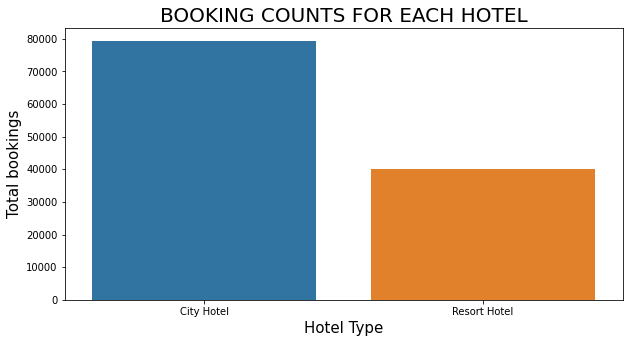

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=hotel_type, y=hotel_booked).set_title('BOOKING COUNTS FOR EACH HOTEL', fontsize=20)

plt.xlabel('Hotel Type', fontsize=15)
plt.ylabel('Total bookings', fontsize=15)


Text(0, 0.5, 'Total count')

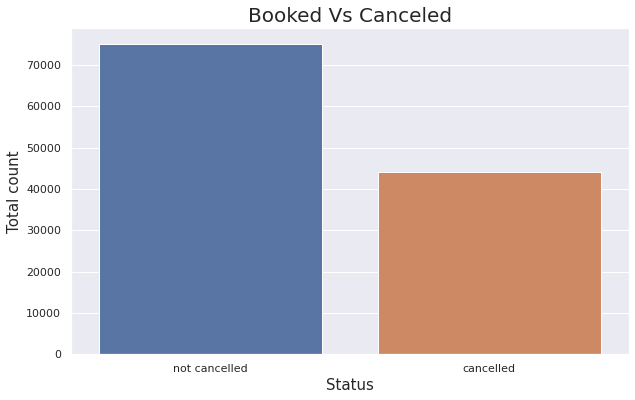

In [ ]:
# is_canceled Bar Plot
# plt.figure(figsize=(5,2))
cancelled_df = df['is_canceled'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=['not cancelled', 'cancelled'], y=cancelled_df['is_canceled']).set_title('Booked Vs Canceled', fontsize= '20')
sns.set_theme(style="darkgrid",font='sans-serif')
plt.xlabel('Status', fontsize='15')
plt.ylabel('Total count', fontsize='15')

In [ ]:
df.groupby(['is_canceled']).sum()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,,,,,,,,,,,,,,,,,,,
0,6012129,151545744,2035506,1190594,69827,185213,137534,7693.0,780,3258,1187,15257,22051,5911971.0,1068051.0,119504,7515674.93,7464,53673
1,6405794,89163187,1207744,695558,40919,113298,84102,4710.0,169,552,9214,1111,4349,3021782.0,218395.0,157618,4641942.67,0,14542


In [ ]:
df.groupby(['is_canceled'])['required_car_parking_spaces'].sum().reset_index()
# This Data Shows that cancellation of those hotels was done where parking spaces were zero.
# All the hotels which were cancelled, none of them had any parking spaces, as we can see the sum of the parking spaces equals to Zero.
# Where as those hotels where bookings were not cancelled had parking spaces which summed up to '7464'

,is_canceled,required_car_parking_spaces
0,0,7464
1,1,0


In [ ]:
df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

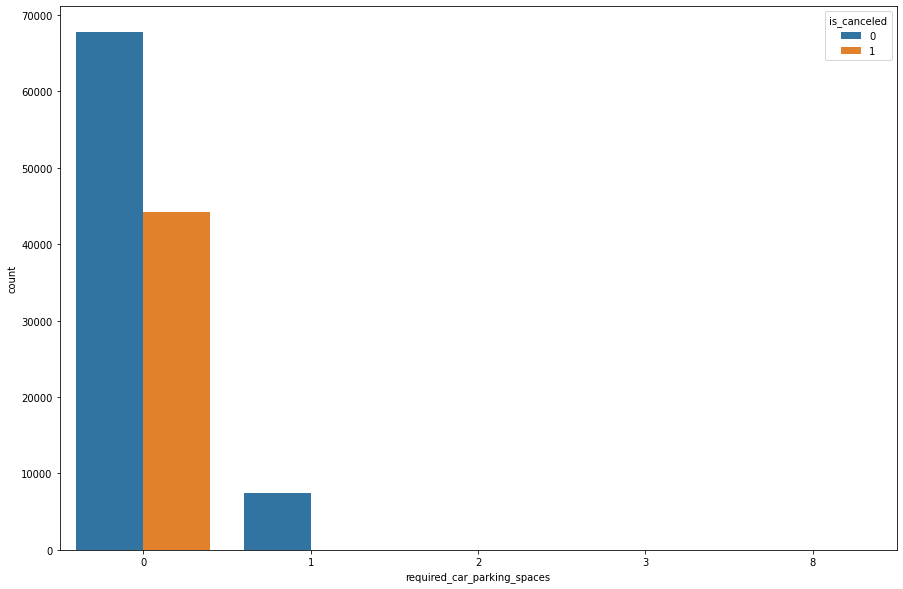

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='required_car_parking_spaces', hue='is_canceled')

In [ ]:
# Lead time description and distribution plot
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [ ]:
# Check for outliers, as mean is 104
df[df['lead_time']>500].count()[0]
# We can see that there are more than 400 values above 500, so no outliers

481

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

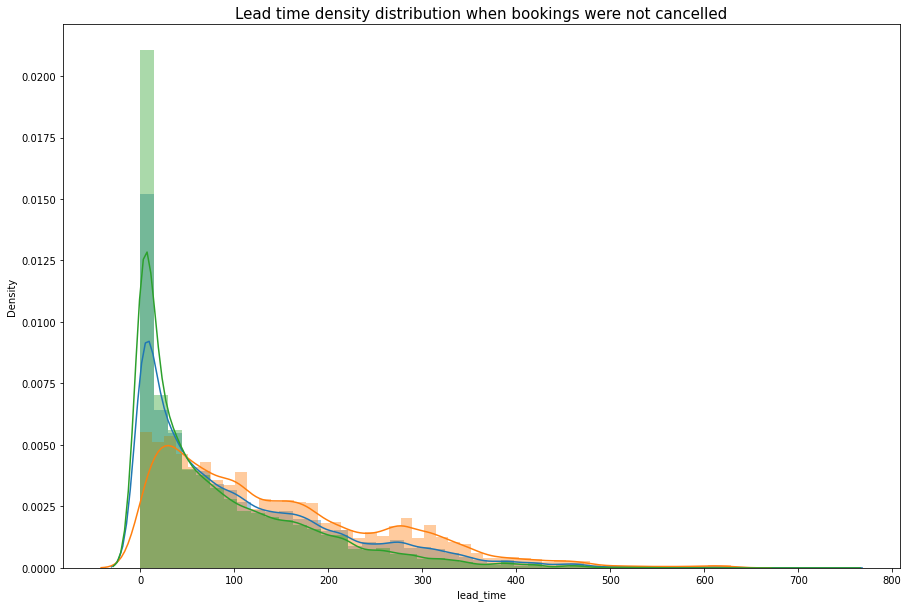

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['lead_time']).set_title('Distribution plot for density', fontsize=20)
sns.distplot(df[df['is_canceled']==1]['lead_time']).set_title('Lead time density distribution when bookings were cancelled', fontsize=15)
sns.distplot(df[df['is_canceled']==0]['lead_time']).set_title('Lead time density distribution when bookings were not cancelled',fontsize=15)
plt.show()
# Graph is positively skewed, and most of the values lies between 0-50, which restricted the mean value to 104.

In [ ]:
df1=df[df['is_canceled']==1]['lead_time'].describe().reset_index().rename(columns={'lead_time':'lead_time when booking canceled'})
df2=df[df['is_canceled']==0]['lead_time'].describe().reset_index().rename(columns={'lead_time':'lead_time when not cancelled'})
lead_time_df = pd.merge(df1,df2,how='outer', on='index')

lead_time_df['Percent change']=(lead_time_df['lead_time when booking canceled']-lead_time_df['lead_time when not cancelled'])/lead_time_df['lead_time when not cancelled']*100
lead_time_df
# We can see that mean lead time for cancelled booking was 90% higher than not cancelled
# Which leads to the conclusion that people who booked hotels more than 4 months prior have more chances of getting cancelled than hotels booked within a month. 

,index,lead_time when booking canceled,lead_time when not cancelled,Percent change
0,count,44224.000000,75166.000000,-41.164888
1,mean,144.848815,79.984687,81.095682
2,std,118.624829,91.109888,30.199731
3,min,0.000000,0.000000,NaN
4,25%,48.000000,9.000000,433.333333
5,50%,113.000000,45.000000,151.111111
6,75%,214.000000,124.000000,72.580645
7,max,629.000000,737.000000,-14.654003


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


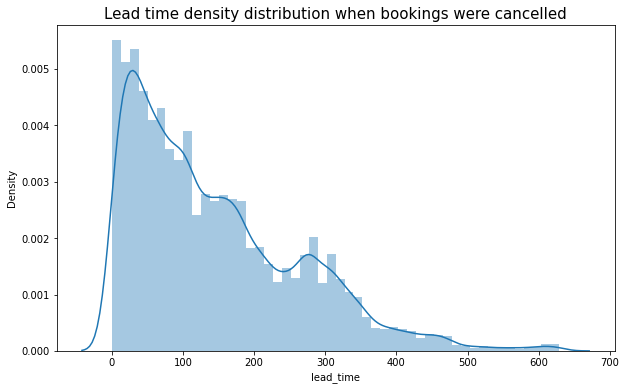

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['is_canceled']==1]['lead_time']).set_title('Lead time density distribution when bookings were cancelled', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


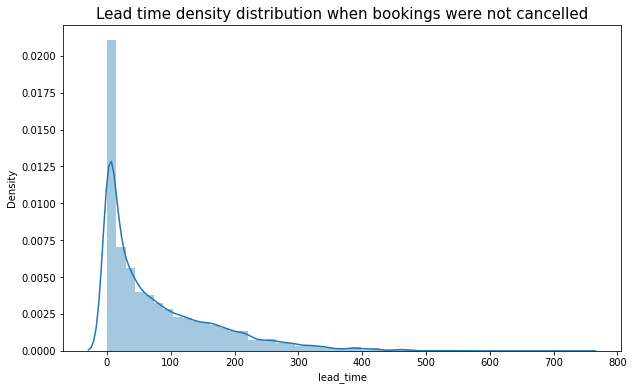

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['is_canceled']==0]['lead_time']).set_title('Lead time density distribution when bookings were not cancelled',fontsize=15)
plt.show()

# After analyzing both density distribution we can see that lead time of cancelled bookings was more scattered than bookings which were not cancelled.

Text(0.5, 1.0, 'Boxplot of Lead Time vs bookings and cancellations')

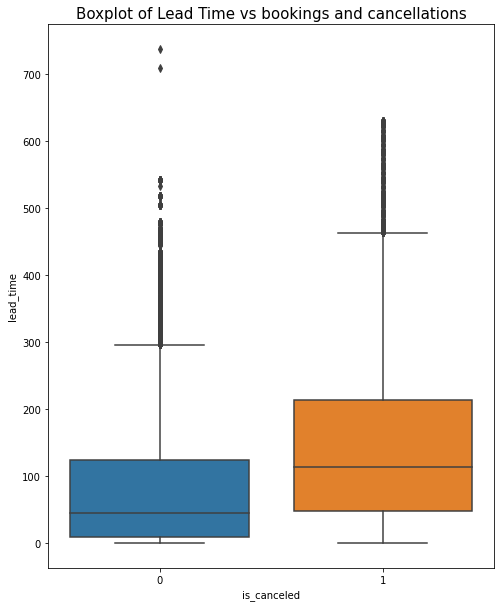

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df, x='is_canceled', y='lead_time',).set_title('Boxplot of Lead Time vs bookings and cancellations', fontsize=15)

Text(0, 0.5, 'No. of bookings')

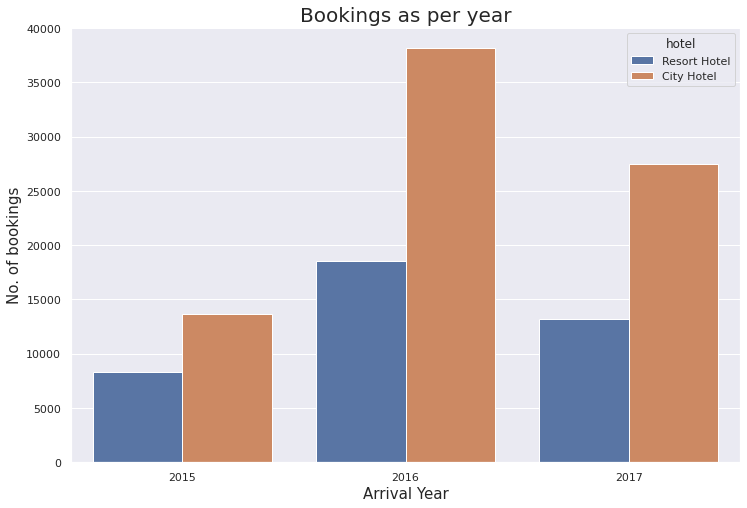

In [6]:
# Arrival date year bar plot
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid",font='sans-serif')
sns.countplot(data=df, x='arrival_date_year', hue='hotel').set_title('Bookings as per year', fontsize=20)
plt.xlabel('Arrival Year', fontsize=15)
plt.ylabel('No. of bookings', fontsize=15)

Text(0.5, 1.0, 'Bookings as per month')

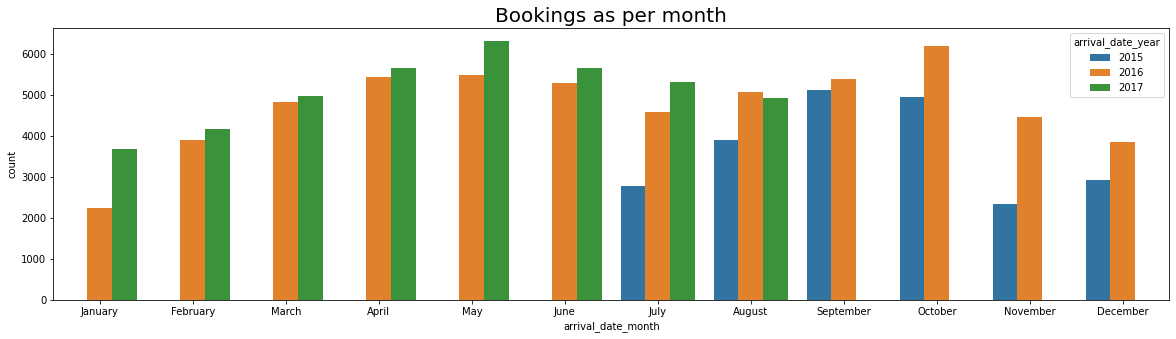

In [ ]:
# Arrival date week bar plot
usual=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='arrival_date_month', hue='arrival_date_year', order=usual).set_title('Bookings as per month', fontsize=20)

Text(0.5, 1.0, 'Bookings as per week')

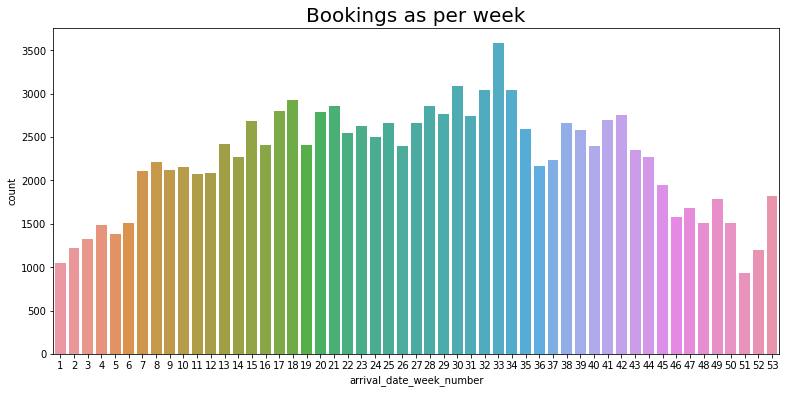

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='arrival_date_week_number').set_title('Bookings as per week', fontsize=20)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
wl=df['days_in_waiting_list'].value_counts().reset_index().sort_values(by='index').rename(columns={'index':'days_in_WL','days_in_waiting_list':'frequency'})
wl

,days_in_WL,frequency
0,0,115692
78,1,12
89,2,5
19,3,59
52,4,25
...,...,...
38,236,35
80,259,10
74,330,15
72,379,15


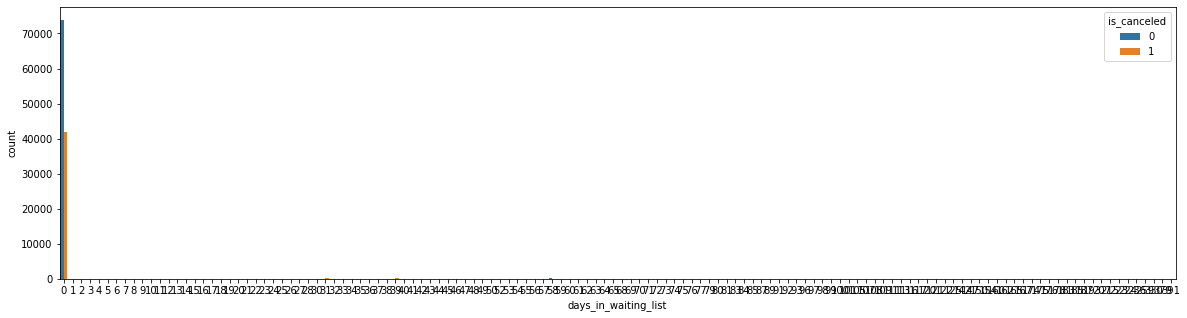

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='days_in_waiting_list', hue='is_canceled')

# Waiting list is not a mojor factor for booking cancellations. As most of the bookings which had zero waiting period were cancelled

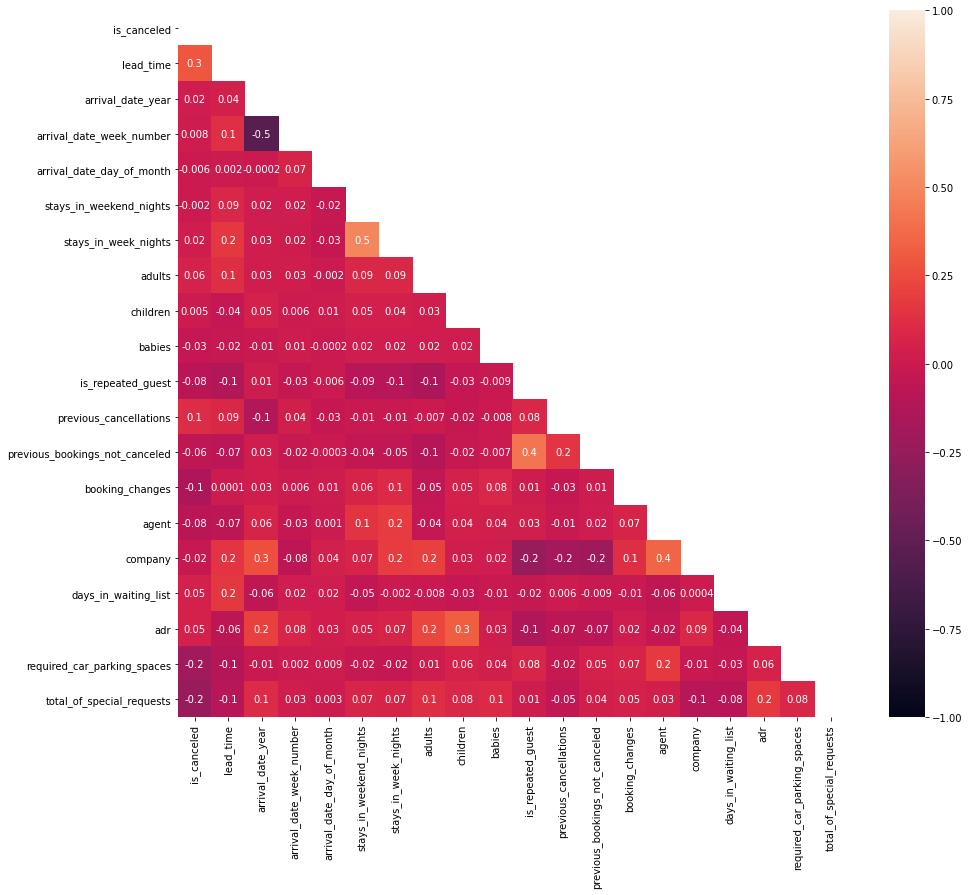

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, fmt='.1g', mask=np.triu(df.corr()))

Major findings:

•Parking spaces is one of the major reason of cancellation, Hotels which lack parking space people avoid it, as most of them must be travelling with 4 wheelers and need parking spaces.

•LeadTime is also a major factor for hotels, if a customer has booked room more than 4 months prior to arrival time, chances of their cancellation increases significantly compared to people who booked within 1 month of arrival

•People from the given locations avoid travelling in Nov,Dec, Jan, Feb and these month might not be as profitable for hotels compared to other months as demand for hotels is less. 

•People who are repeated guests have low chances of cancellation.

•When guests arrive along children ADR increases